In [176]:
import pandas as pd


In [177]:
dataset_name = '1138_bus'

SS = 'Sparse-SGD'
FR = 'Fruchterman-Reingold'
FM3 = 'FM3'
KK = 'Kamada-Kawai'

layout_names = sorted([SS, FR, FM3, KK])


quality_metrics_names = sorted([
        'angular_resolution',
        'aspect_ratio',
        'crossing_angle',
        'crossing_number',
        'gabriel_graph_property',
        'ideal_edge_length',
        'node_resolution',
        'shape_based_metrics',
        'stress'
])

directions = {
  "angular_resolution": "maximize",
  "aspect_ratio": "maximize",
  "crossing_angle": "minimize",
  "crossing_number": "minimize",
  "gabriel_graph_property": "maximize",
  "ideal_edge_length": "minimize",
  "node_resolution": "maximize",
  "run_time": "minimize",
  "shape_based_metrics": "maximize",
  "stress": "minimize"
}


In [178]:
df = pd.DataFrame()

for layout_name in layout_names:
    df = pd.concat([df, pd.read_pickle(
        f'data/params/search/results/{layout_name}/{dataset_name}.pkl')])



In [179]:
df

,graph,layout,params,target_params,quality_metrics,pos
0,1138_bus,FM3,"{'unit edge length': 30.0, 'new initial placem...",fixed iterations,"{'angular_resolution': 0.001475188901735126, '...","{'5': [395.857177734375, 1027.6119384765625], ..."
0,1138_bus,FM3,"{'unit edge length': 30.0, 'new initial placem...",fixed iterations,"{'angular_resolution': 0.0012551338597997324, ...","{'5': [404.0082702636719, 1039.3521728515625],..."
0,1138_bus,FM3,"{'unit edge length': 30.0, 'new initial placem...",fixed iterations,"{'angular_resolution': 0.0002715068013449597, ...","{'5': [399.3687744140625, 1039.9296875], '1': ..."
0,1138_bus,FM3,"{'unit edge length': 30.0, 'new initial placem...",fixed iterations,"{'angular_resolution': 9.77787075174528e-06, '...","{'5': [402.1322326660156, 1018.5202026367188],..."
0,1138_bus,FM3,"{'unit edge length': 30.0, 'new initial placem...",fixed iterations,"{'angular_resolution': 0.0009872635520042819, ...","{'5': [400.7904052734375, 1009.2124633789062],..."
...,...,...,...,...,...,...
0,1138_bus,Sparse-SGD,"{'edge_length': 30, 'number_of_pivots_rate': 0...",eps,"{'angular_resolution': 0.00088439518894068, 'a...","{'5': (-276.7572937011719, 135.72360229492188)..."
0,1138_bus,Sparse-SGD,"{'edge_length': 30, 'number_of_pivots_rate': 0...",eps,"{'angular_resolution': 0.0009278186243668839, ...","{'5': (396.5125732421875, 18.374950408935547),..."
0,1138_bus,Sparse-SGD,"{'edge_length': 30, 'number_of_pivots_rate': 0...",eps,"{'angular_resolution': 0.0006859018351459405, ...","{'5': (-253.23020935058594, -255.3731689453125..."
0,1138_bus,Sparse-SGD,"{'edge_length': 30, 'number_of_pivots_rate': 0...",eps,"{'angular_resolution': 2.568233370241017e-05, ...","{'5': (187.07736206054688, 75.133544921875), '..."


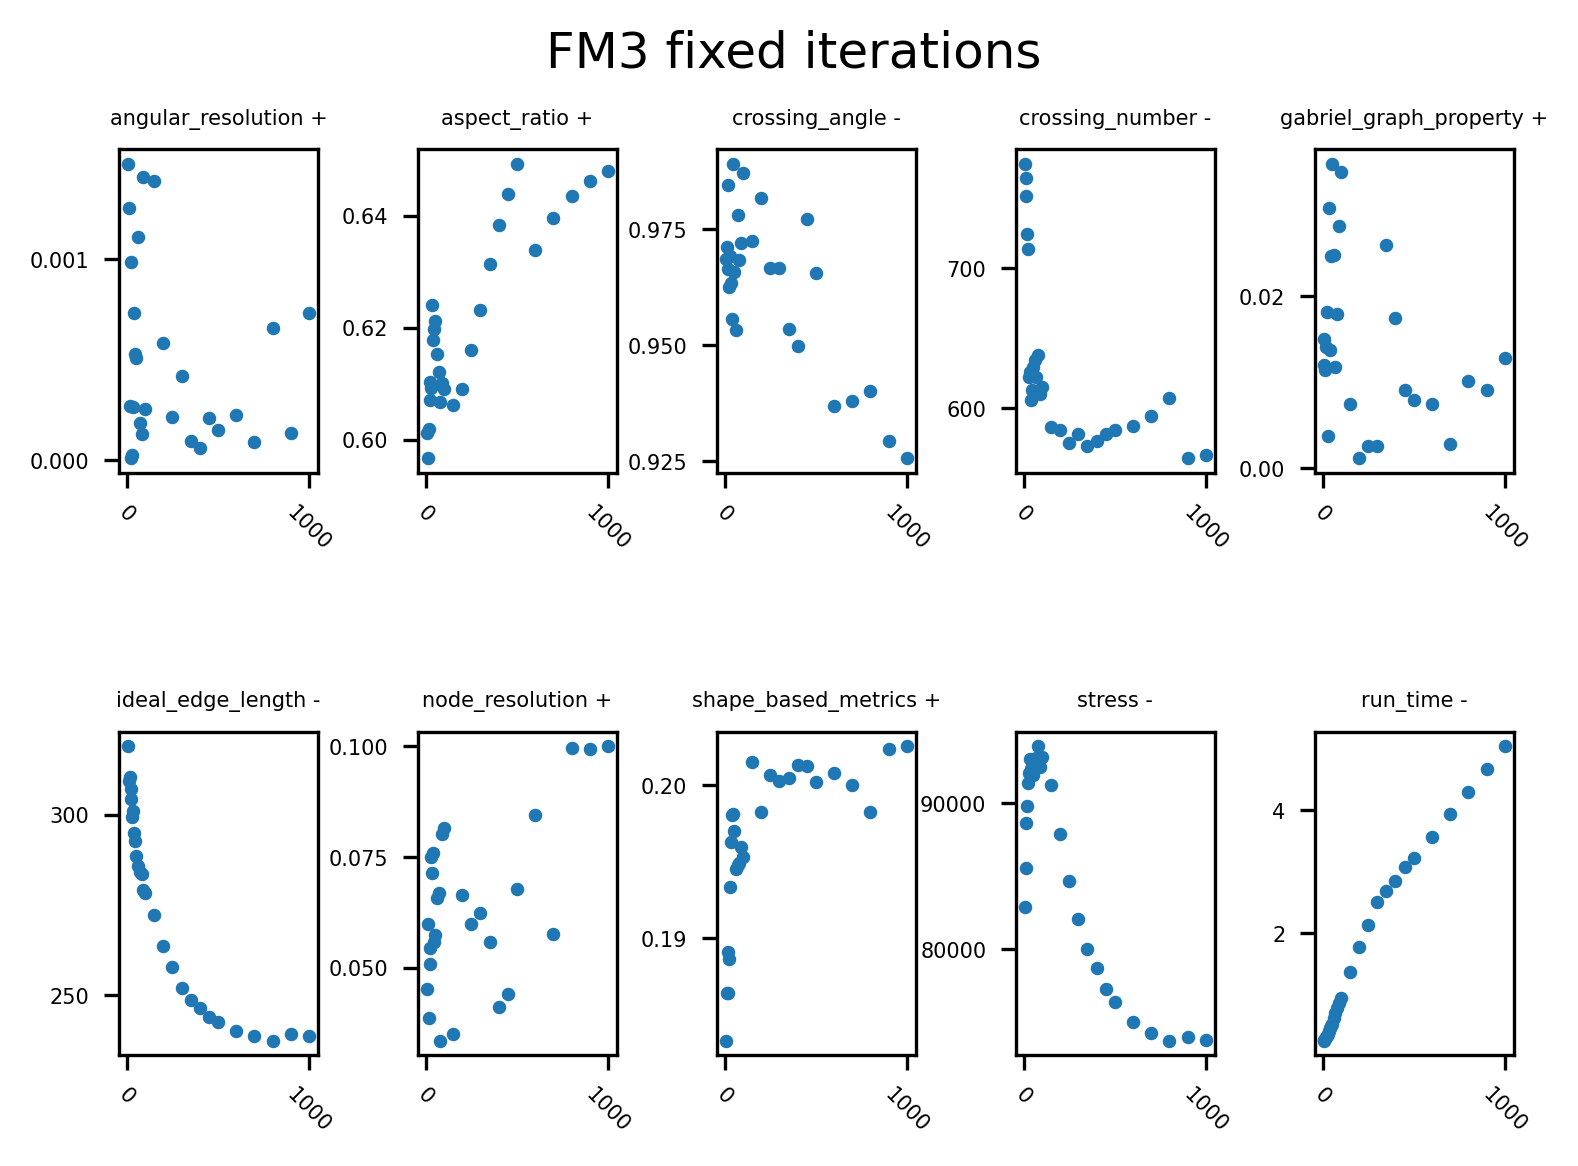

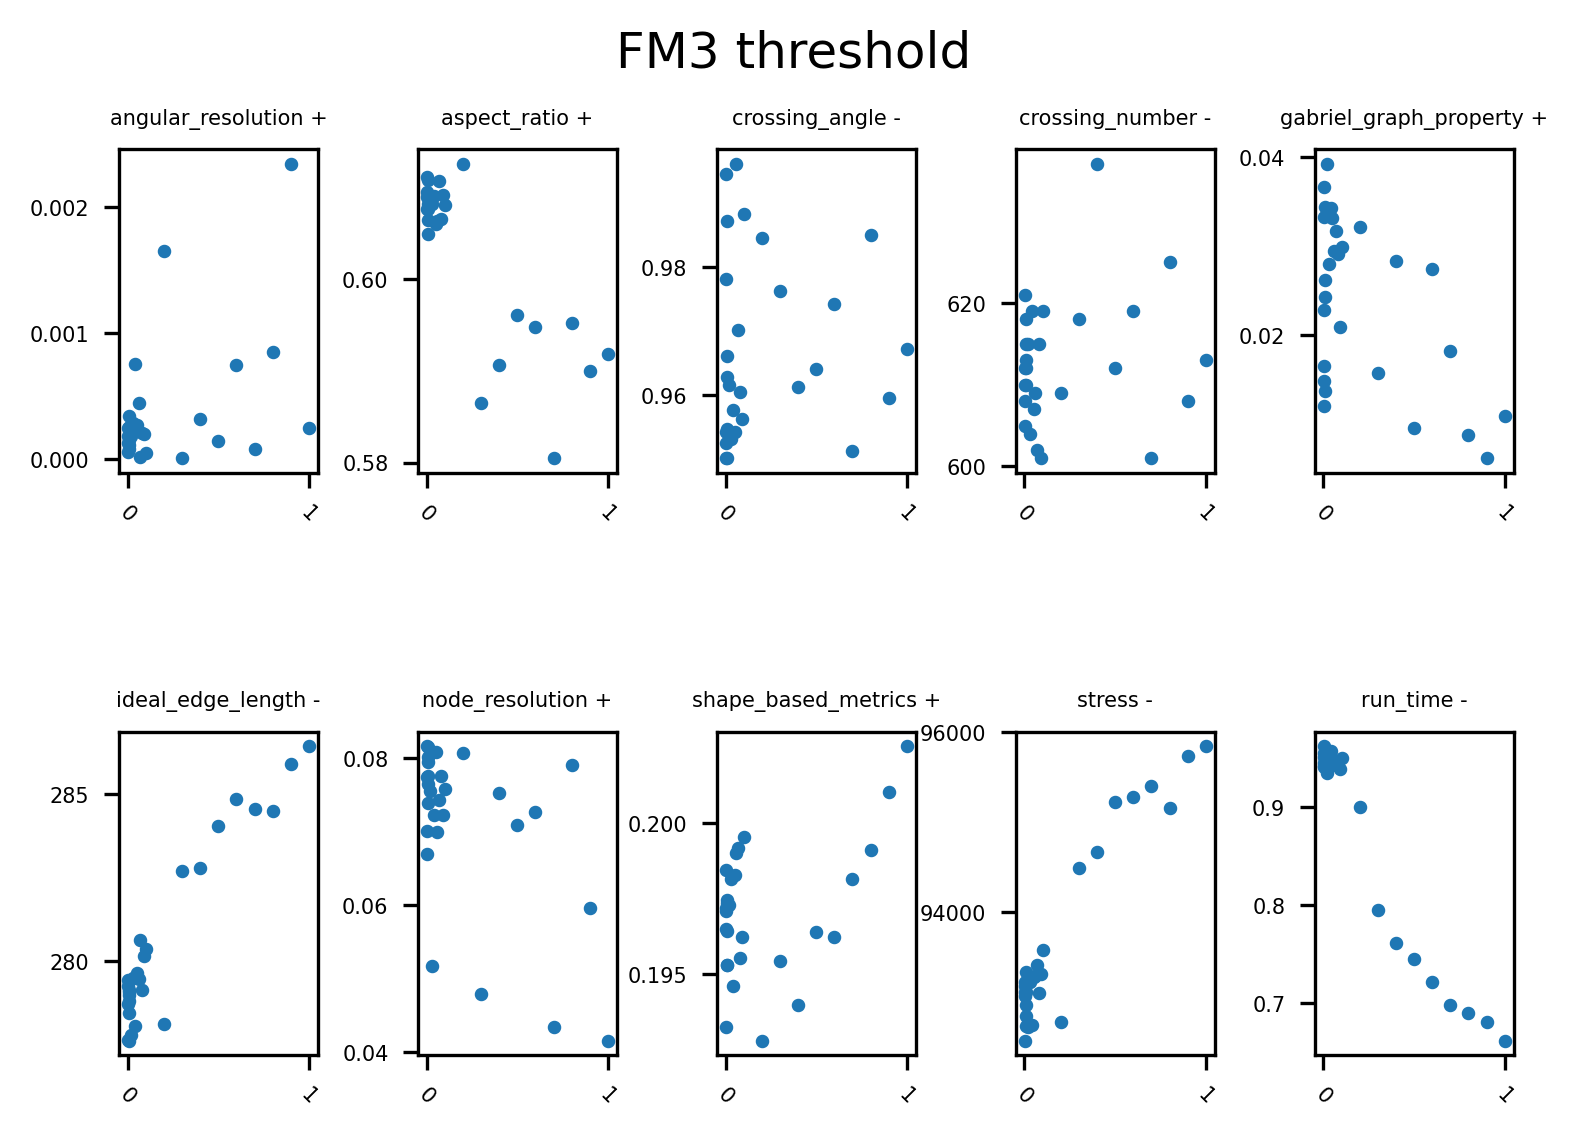

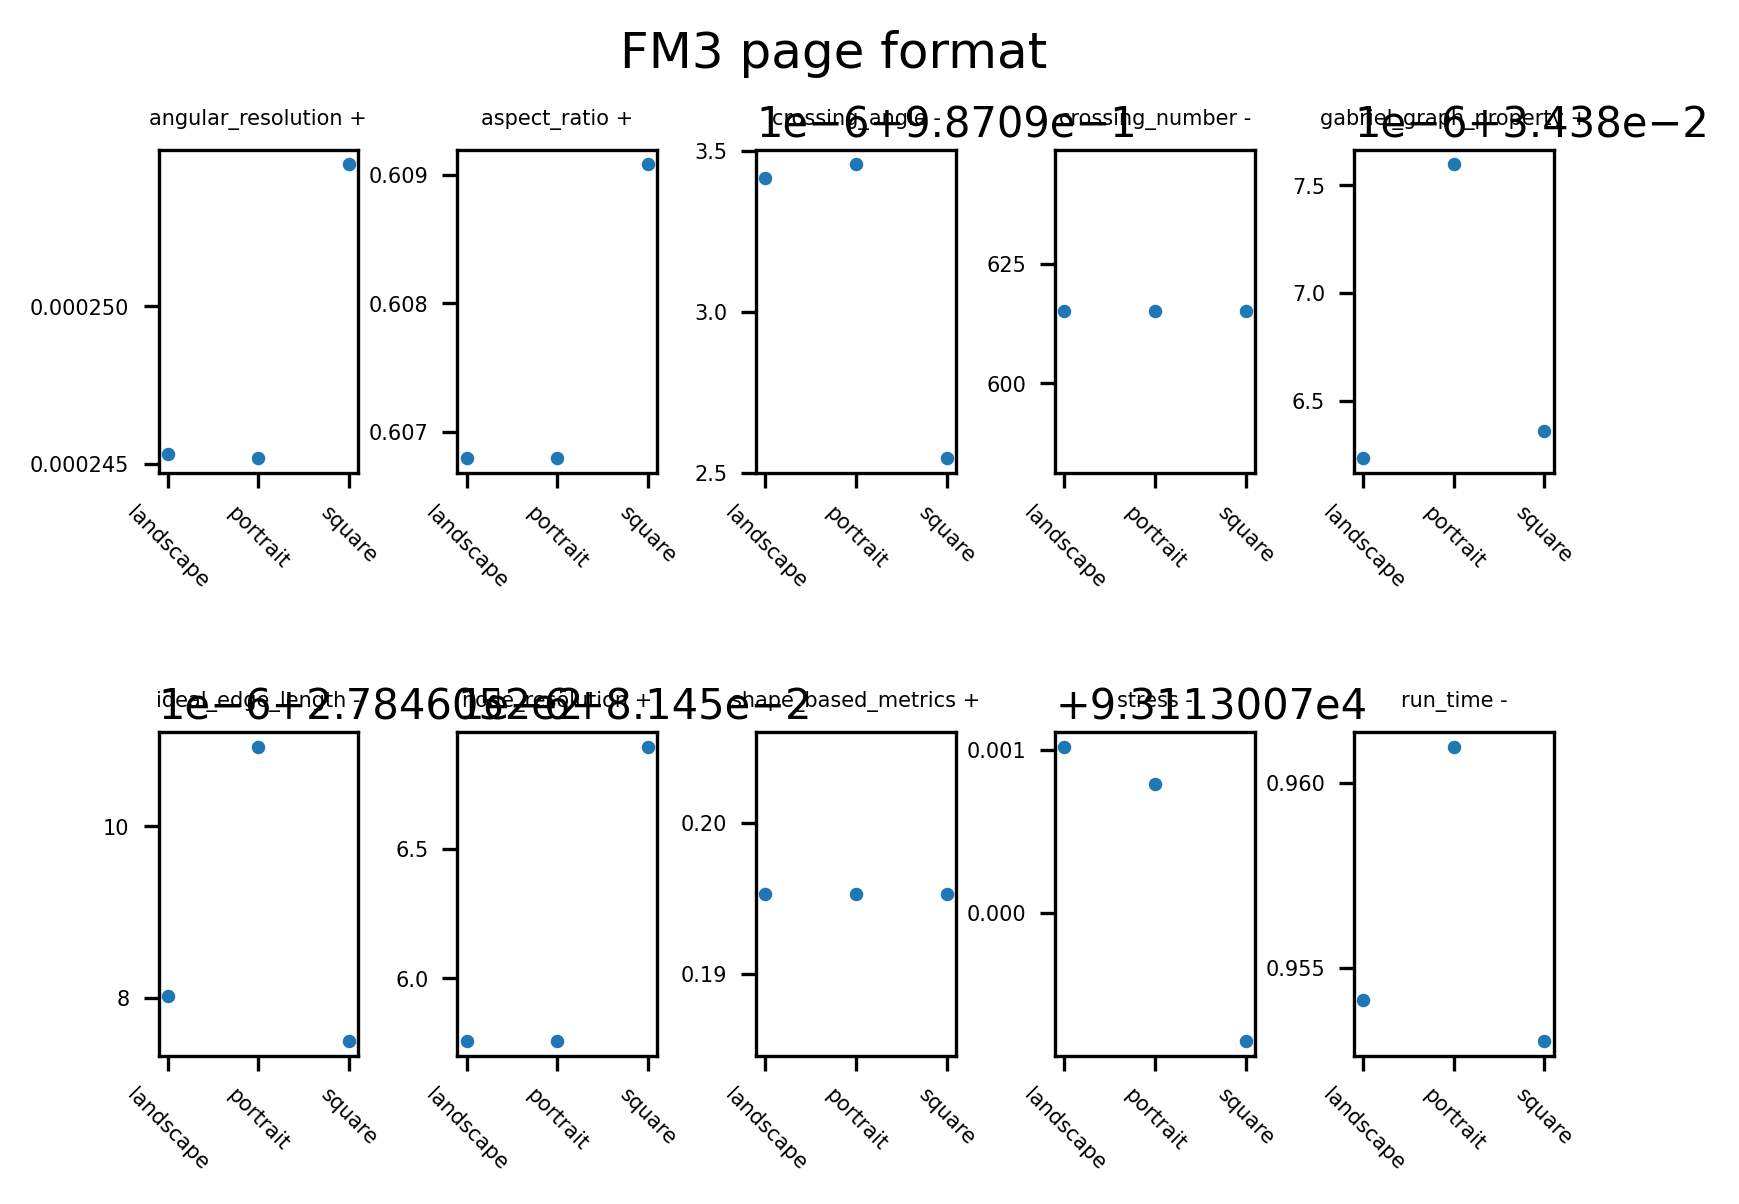

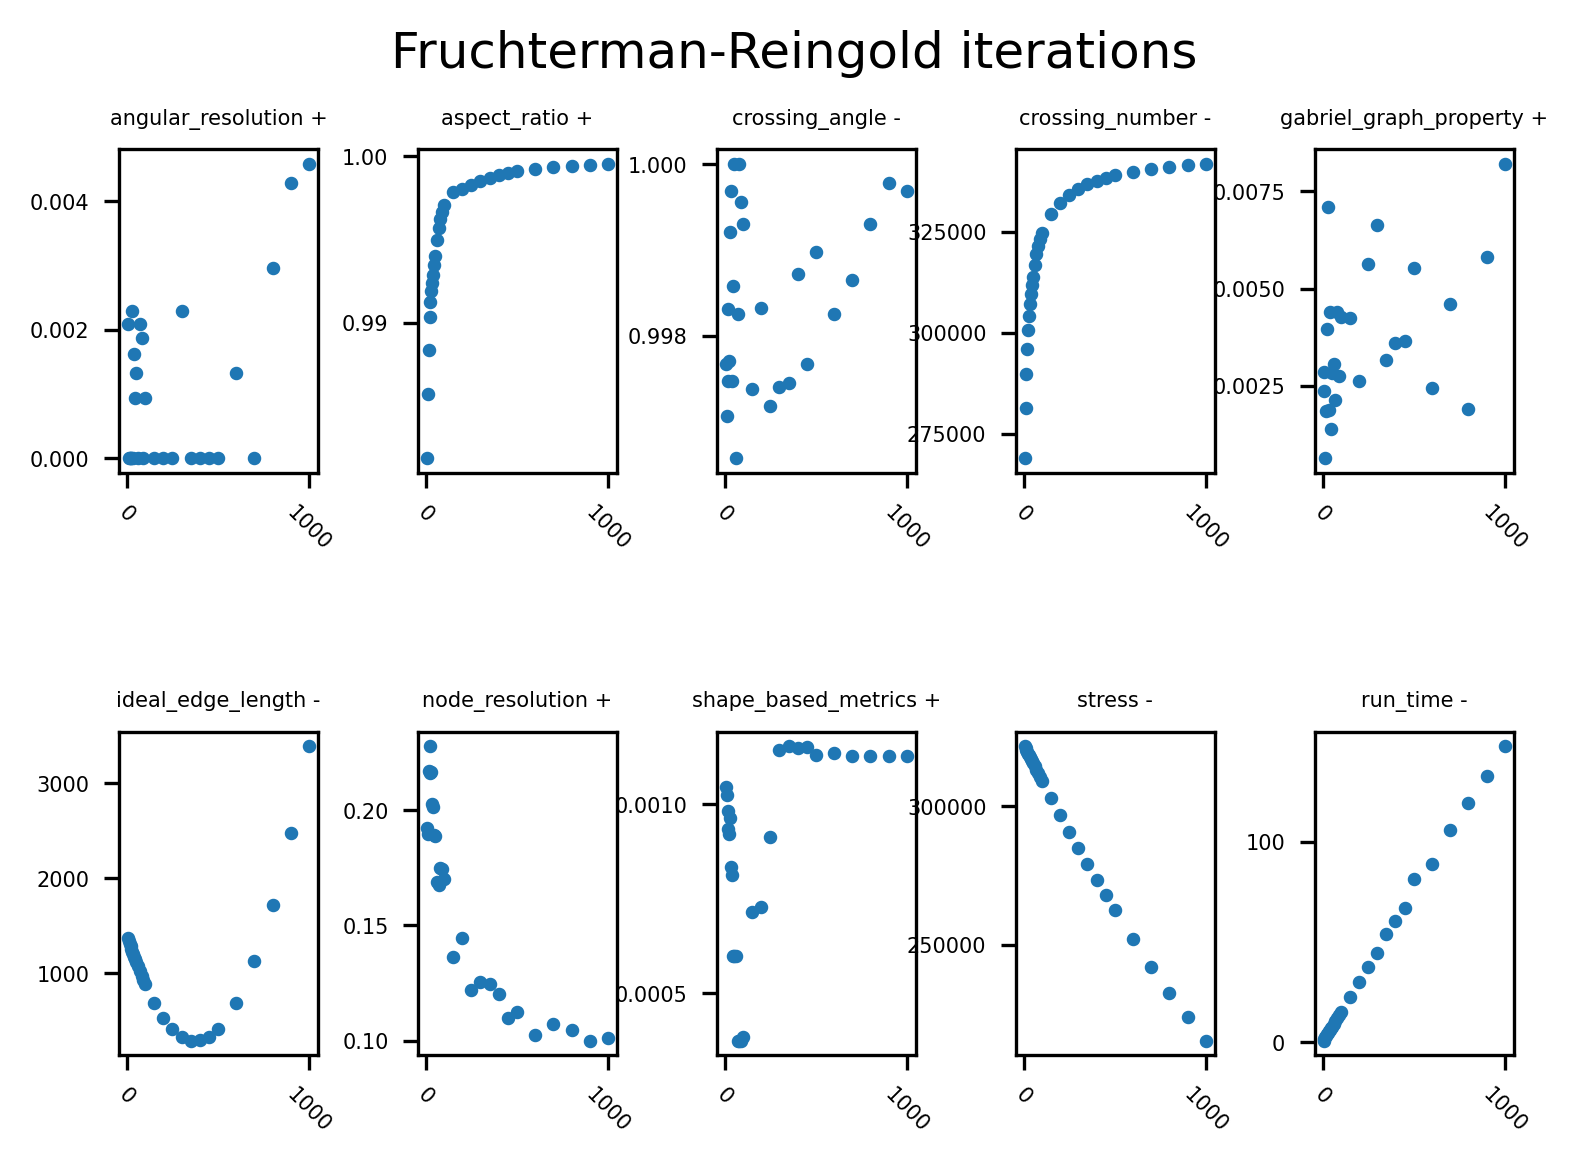

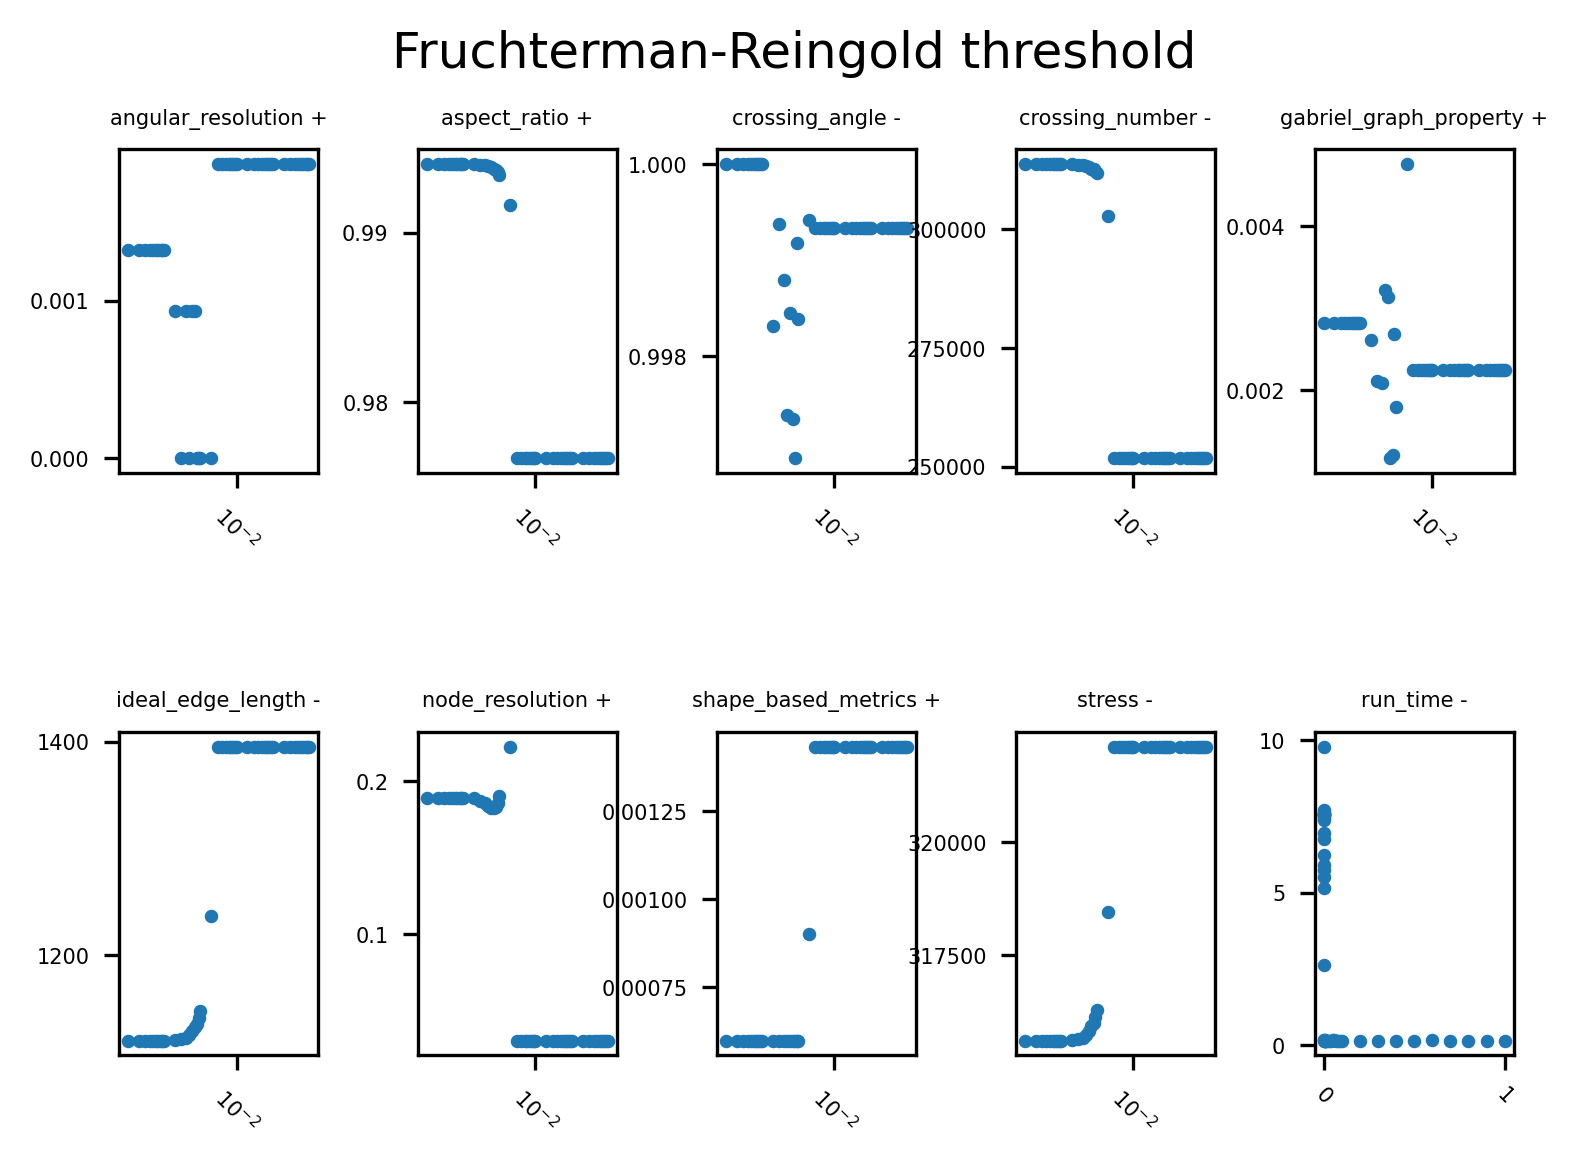

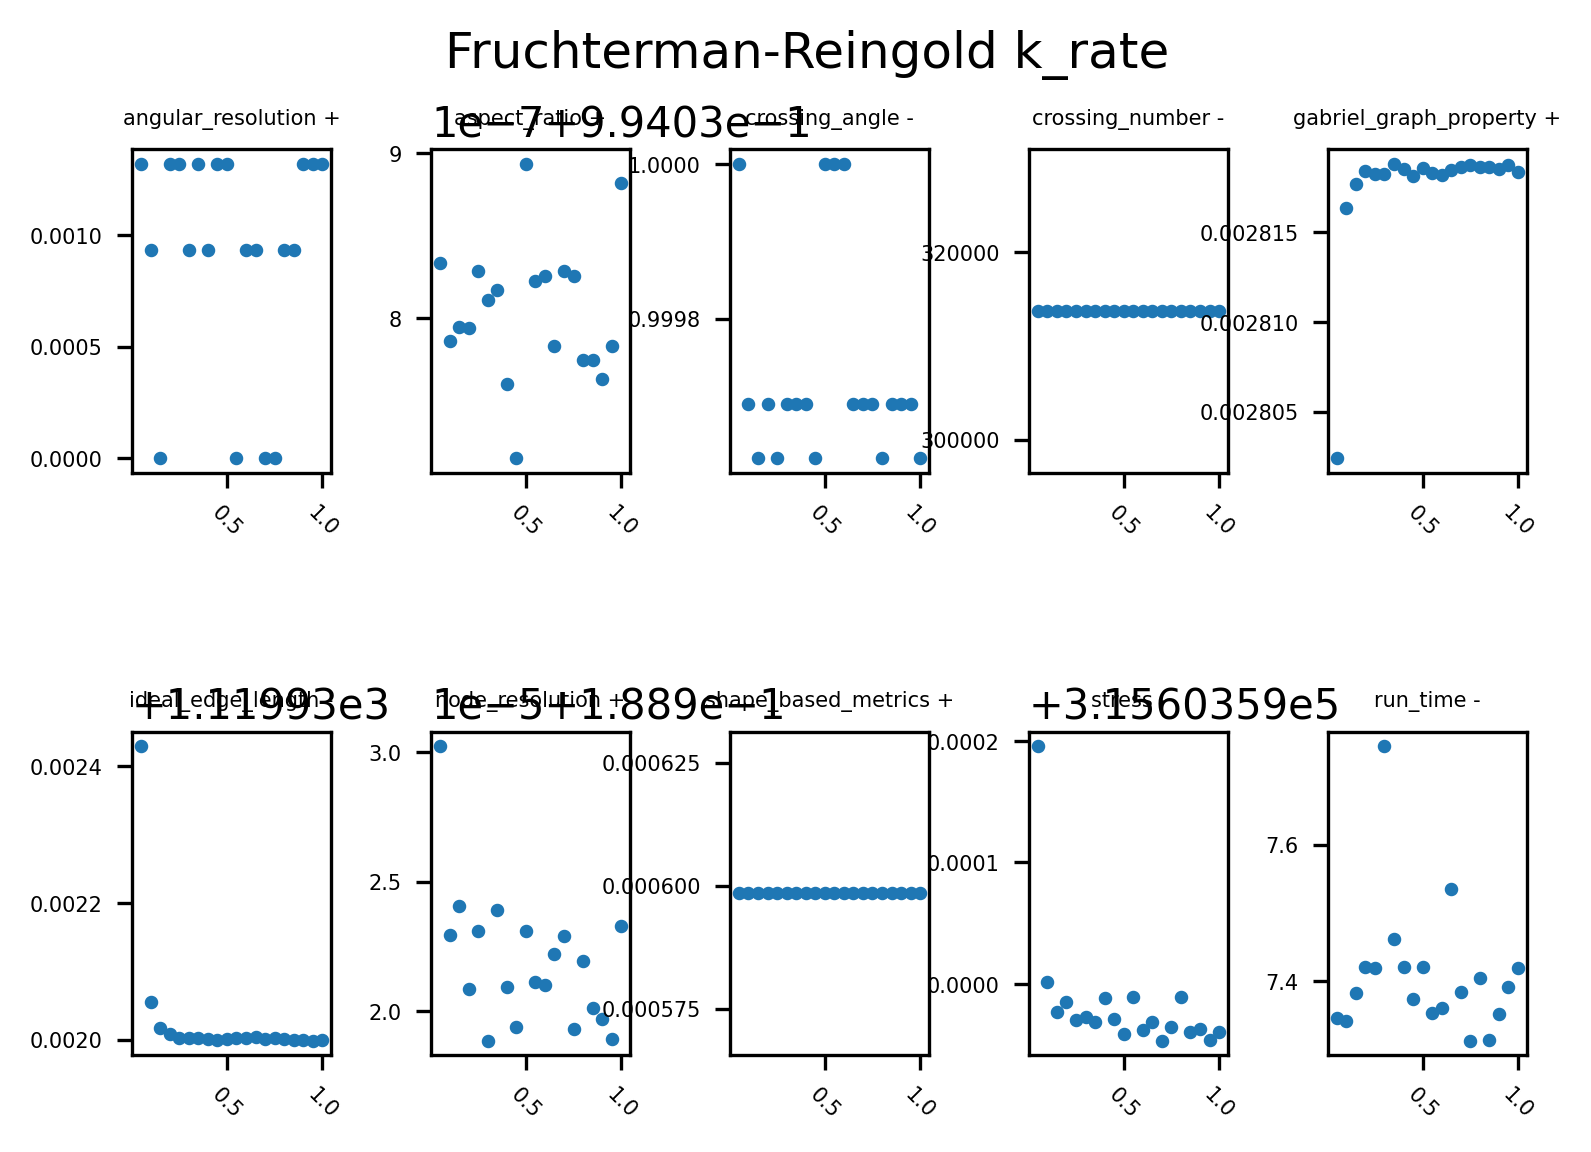

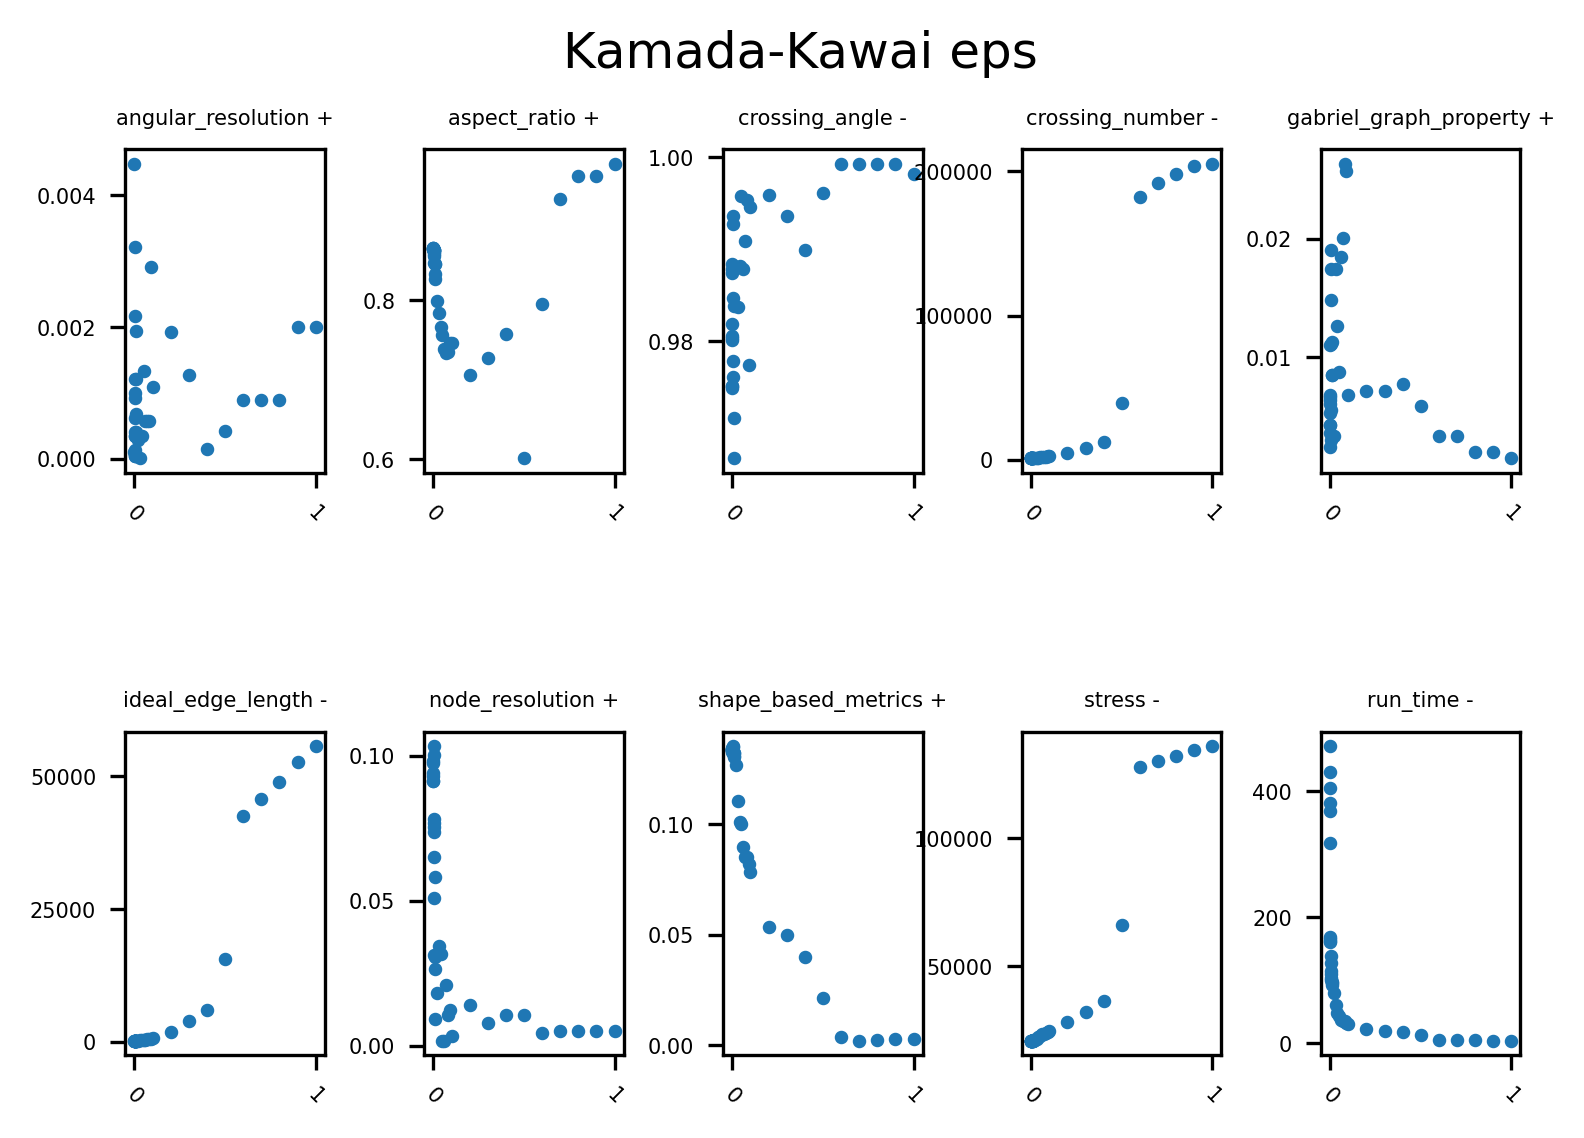

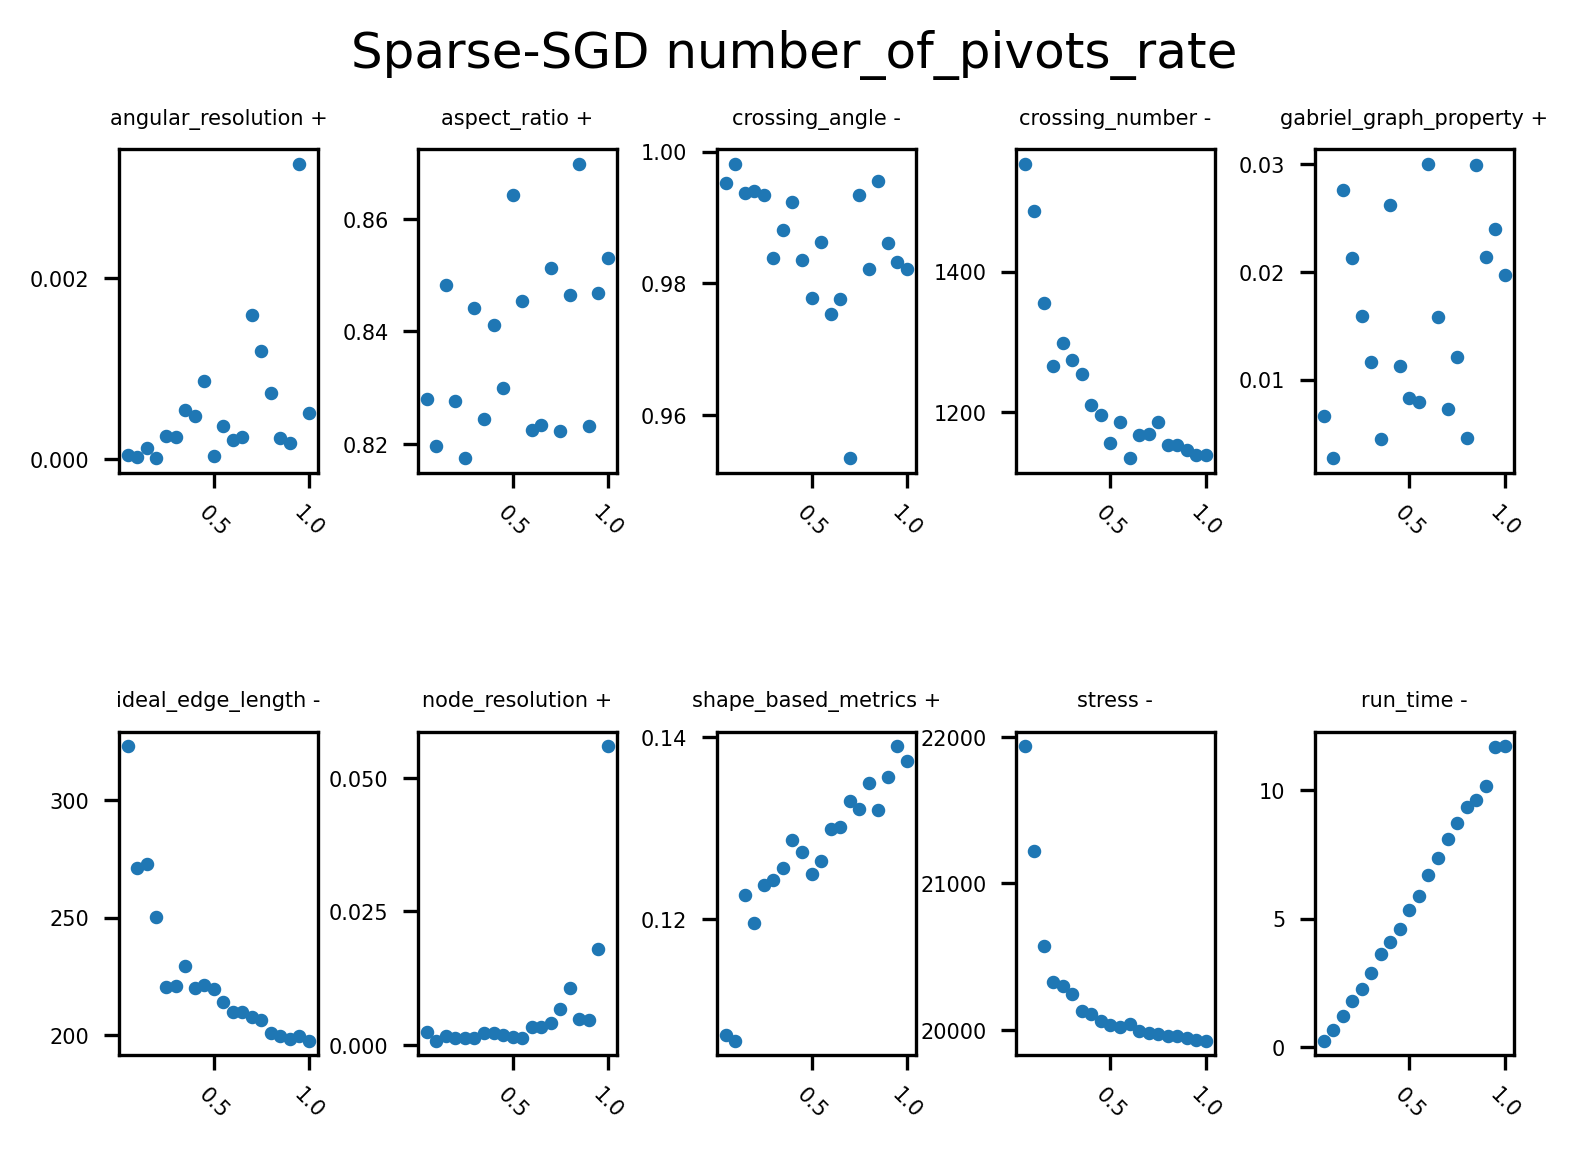

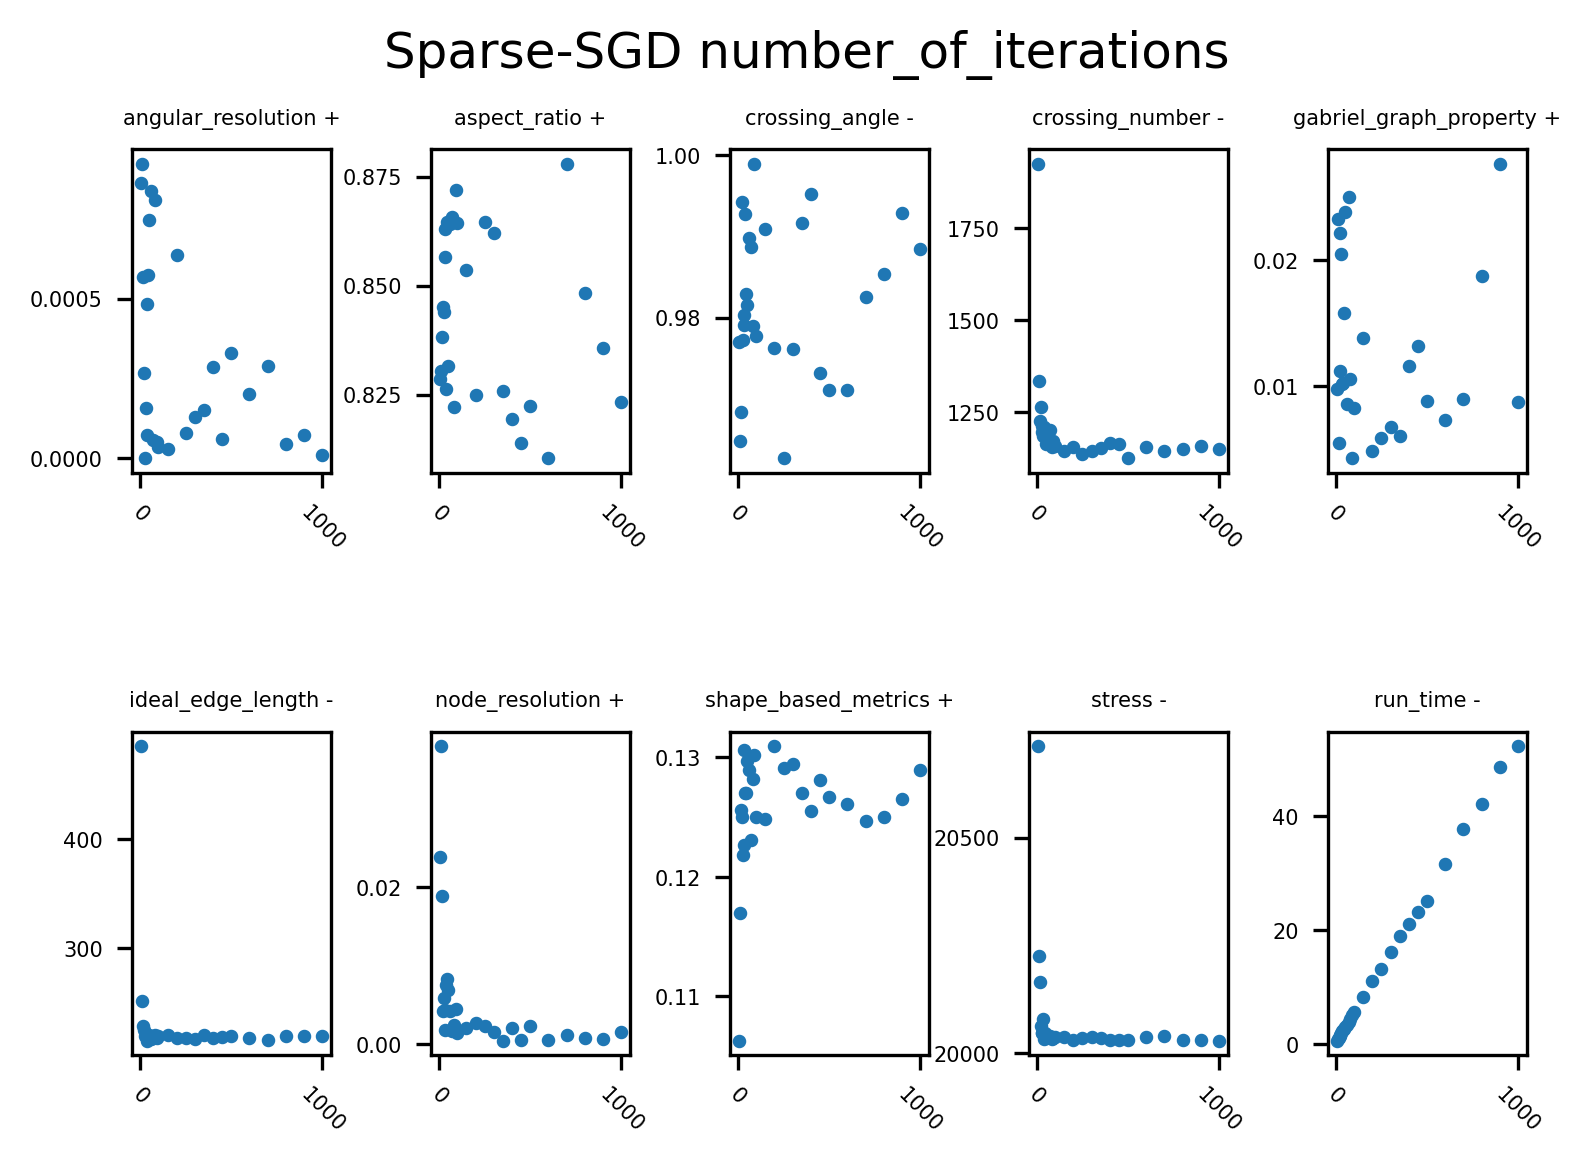

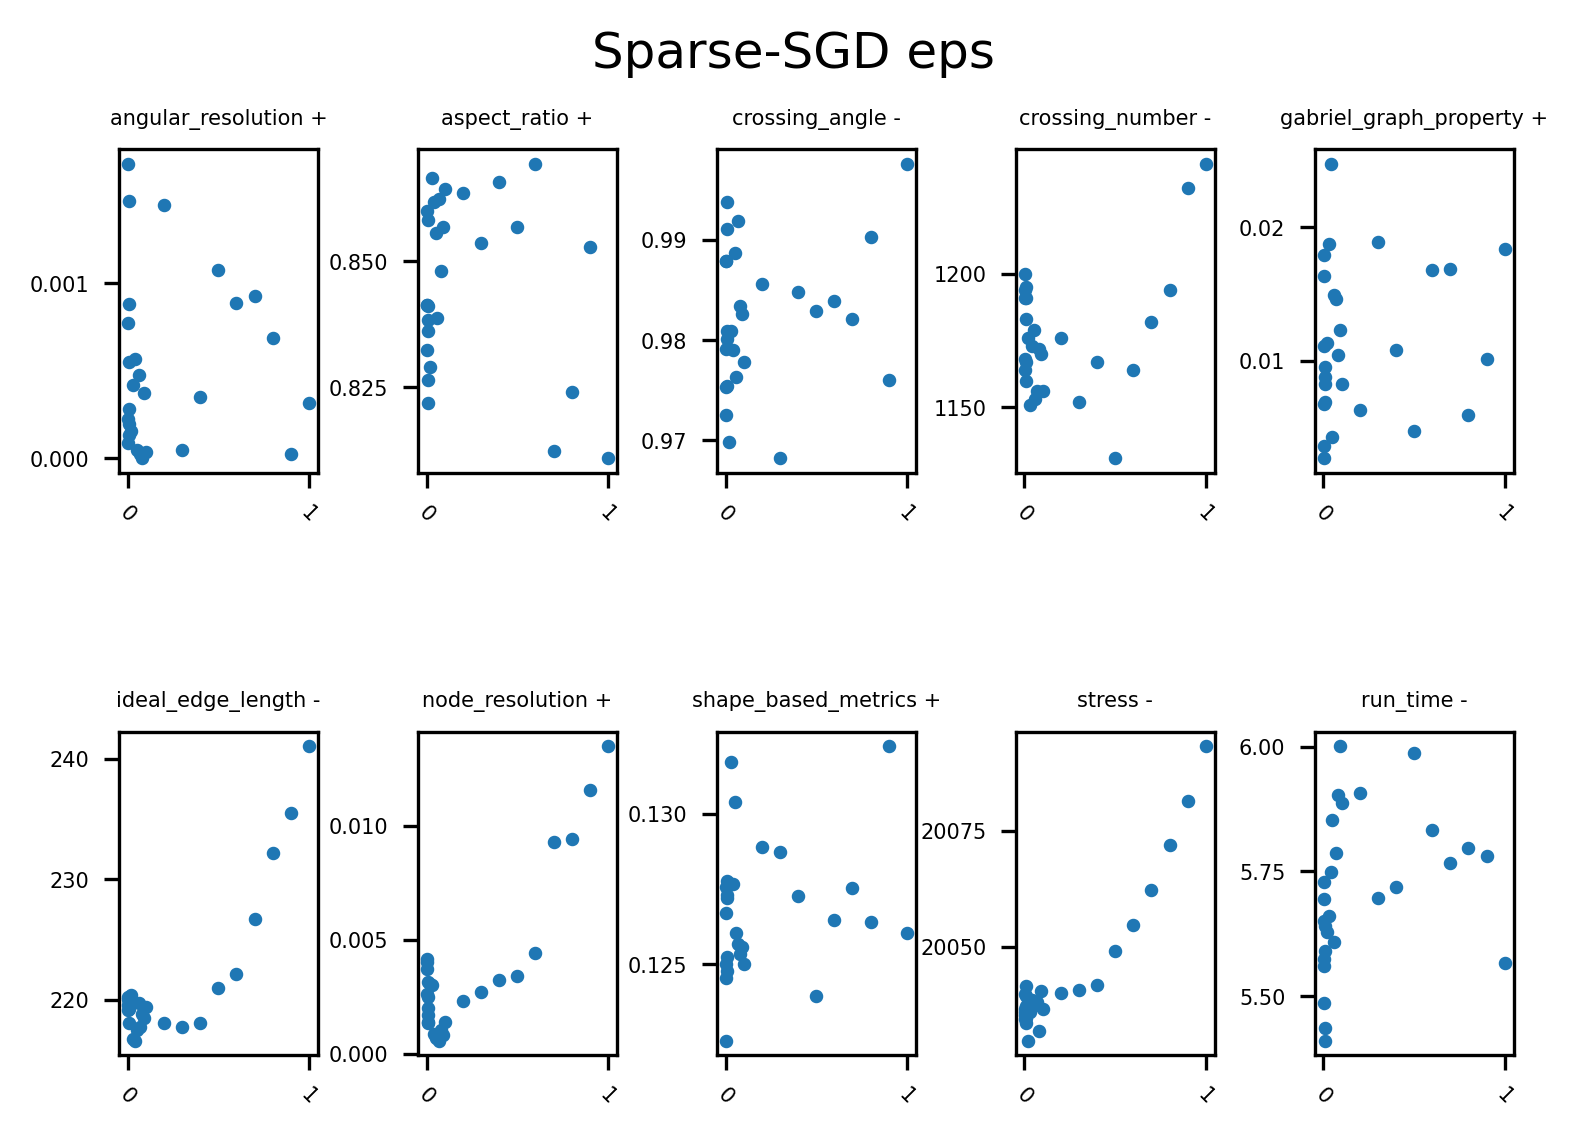

In [180]:
import matplotlib.pyplot as plt
import math

quality_metrics_names = list(df['quality_metrics'].head(1).values[0].keys())

for layout_name in layout_names:
    target_df = df[df['layout'] == layout_name]
    target_params_names = target_df['target_params'].unique().tolist()
    for target_params_name in target_params_names:
        target_params_df = target_df[target_df['target_params']
                                     == target_params_name]

        plt.figure(dpi=300, facecolor='white')
        plt.subplots_adjust(wspace=0.5, hspace=0.8)

        ymap = {}
        xs = []
        for i, row in target_params_df.iterrows():
            xs.append(row['params'][row['target_params']])
            for q_name in row['quality_metrics']:
                if q_name not in ymap:
                    ymap[q_name] = []
            for q_name in row['quality_metrics']:
                ymap[q_name].append(row['quality_metrics'][q_name])
        placement_i = 1
        plt.suptitle(f'{layout_name} {target_params_name}')
        for q_name in ymap:
            if target_params_name == 'threshold' and layout_name == 'Fruchterman-Reingold':
                plt.xscale('log')
            plt.subplot(2, 5, placement_i)
            plt.xticks(fontsize=5, rotation=-45)
            plt.yticks(fontsize=5)
            plt.title(
                f"{q_name} {'+' if directions[q_name] == 'maximize' else '-'}", fontsize=5)
            plt.scatter(xs, ymap[q_name], s=5)
            placement_i += 1
        plt.show()


In [181]:
layout_name = 'FM3'
target_df = df[df['layout'] == layout_name]
target_params_df = target_df[target_df['target_params'] == target_params_name]

for i, v in target_params_df.iterrows():
    print(v['params'][v['target_params']])
    break